# Analyzing cars' MPG

In the given dataset there are 398 different cars from 1970 to 1982.
I will be analyzing some of the aspects and see how they affect the MPG (mile per gallon). The larger MPG number is, the better it is.
The data has some bias in terms of that we don't know the engine size (cc value), the road and weather conditions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car_df = pd.read_csv("auto_mpg.csv")

In [3]:
# remove unnecessary columns
car_df.drop(["Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"], axis=1, inplace=True)

# remove the last two rows with bad data
car_df.drop([398, 399], axis=0, inplace=True)

We can get a sense of how the data is like by looking at the first 5 values in it.

In [4]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Model 0,Residue
0,21.0,6.0,200.0,100.0,2875.0,17.0,74.0,1.0,ford maverick,23.51457286,6.323077
1,23.0,4.0,151.0,100.0,3035.0,20.5,82.0,1.0,amc concord dl,23.51457286,0.264785
2,23.6,4.0,140.0,100.0,2905.0,14.3,80.0,1.0,ford mustang cobra,23.51457286,0.007298
3,25.0,4.0,98.0,100.0,2046.0,19.0,71.0,1.0,ford pinto,23.51457286,2.206494
4,34.5,4.0,100.0,100.0,2320.0,15.8,81.0,2.0,renault 18i,23.51457286,120.679609


As we can see, this is the information we get, and we want to try and see what affects the fuel consumption the most.
An assumption can be made that, with time, the engines became more efficient and therefore consume less fuel, resulting in better MPG. 
We will see if that is correct later on in the report.

Relevant information to know is that MPG, displacement, horsepower, weight, and acceleration are continues numbers; that means that they can have any value (negative value doesn't make sense in these terms). The others are not, the reason is that a car cannot have a fraction of a cylinder (like 4.5), so it can only be whole numbers. 

Another note, in this report I will ignore the two last columns ("model 0" and "residue") since I can't find their importance to this report, but they are there for you to have a broader knowledge. 

First, let's see the best MPG achieved in each year, and think if it can give us some insight.

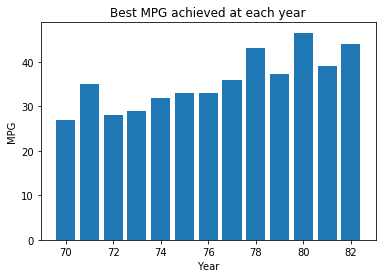

In [5]:
# this plots the best MPG of each year

plt.bar(car_df.year, car_df.mpg)
plt.xlabel("Year")
plt.ylabel("MPG")
plt.title("Best MPG achieved at each year")
plt.show()

The tendency of this graph is growing, which is good. Yet, this is just the best case from each year, so it doesn't necessarily tell us if this is the truth or just a coincident.
Also, we see that the best MPG was achieved in 1980, even though the newest information we have is from 1982. 
So let's dive deeper and see what we can get from the data

In addition, it is essential to check that we have enough, or about the same amount, of data from each year.
This is to avoid a case that there are only very few cars in one year, which can lead to a false assumption regarding this year

In [6]:
# the lables for the pie
years_lab = []
for i in range (13):
    years_lab.append(1970+i)
    
# Array with the amount of sampled cars at each year
amount_cars_year = [len(car_df[car_df.year==70]), len(car_df[car_df.year==71]), len(car_df[car_df.year==72]), len(car_df[car_df.year==73]),
            len(car_df[car_df.year==74]),len(car_df[car_df.year==75]),len(car_df[car_df.year==76]),len(car_df[car_df.year==77]),
            len(car_df[car_df.year==78]),len(car_df[car_df.year==79]),len(car_df[car_df.year==80]),len(car_df[car_df.year==81]),
            len(car_df[car_df.year==82])]

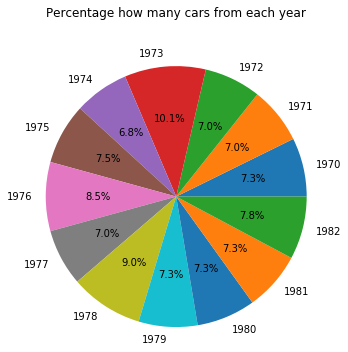

In [7]:
plt.title("Percentage how many cars from each year", y=1.3)
plt.pie(amount_cars_year, labels=years_lab, radius=1.5, autopct="%0.1f%%")
plt.show()

It can be seen that they are about the same amount of cars from each year, so the data will be considered as normal

Now, let's start. The goal was to see if the MPG got improved along the years; and if so why.
So first we want to answer the first question: was the fuel consumption improved in between 1970 to 1982 as a whole?
The next graph will help visualize it.

In [8]:
# lists categorize by years
year_70 = car_df[car_df.year == 70]
year_71 = car_df[car_df.year == 71]
year_72 = car_df[car_df.year == 72]
year_73 = car_df[car_df.year == 73]
year_74 = car_df[car_df.year == 74]
year_75 = car_df[car_df.year == 75]
year_76 = car_df[car_df.year == 76]
year_77 = car_df[car_df.year == 77]
year_78 = car_df[car_df.year == 78]
year_79 = car_df[car_df.year == 79]
year_80 = car_df[car_df.year == 80]
year_81 = car_df[car_df.year == 81]
year_82 = car_df[car_df.year == 82]

In [9]:
# average mpg change by year
avg_mpg_year = [np.mean(year_70.mpg), np.mean(year_71.mpg), np.mean(year_72.mpg), np.mean(year_73.mpg), np.mean(year_74.mpg), 
               np.mean(year_75.mpg), np.mean(year_76.mpg), np.mean(year_77.mpg), np.mean(year_78.mpg), np.mean(year_79.mpg),
               np.mean(year_80.mpg), np.mean(year_81.mpg), np.mean(year_82.mpg)]

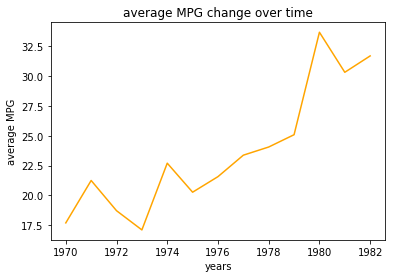

In [10]:
plt.plot(years_lab, avg_mpg_year, color='orange')
plt.title("average MPG change over time")
plt.xlabel("years")
plt.ylabel("average MPG")
plt.show()

This graph definitely shows that the average MPG of the sampled cars got improved.
In 1970 the average was about 17.5 miles per gallon; whereas in 1982  it reached an average of about 32.5 miles per gallon. It has almost doubled.
There are still a few peaks, but the tendency of the graph is clear. As time goes on, cars' engines are more efficient.

I believe that the two things which affect fuel consumption the most are the weight of the car, and the size of the engine. 
(The size of the engine used to be directly proportional to the power the engine produces, the larger the engine size - the more horsepowers the car has. However, nowadays there is still a connection between the two, but it's not so simple since there are turbocharges and other technics I won't get into in this report.)
The engine's size is not given in the data, so we can't check this fact, but we do know the weight of the cars and how many horsepowers they have. So I will work with these.

The graph below will show the average weight of the cars in each year

In [11]:
# list of average weight change by year
avg_weight_year = [np.mean(year_70.weight), np.mean(year_71.weight), np.mean(year_72.weight), np.mean(year_73.weight), 
                  np.mean(year_74.weight), np.mean(year_75.weight), np.mean(year_76.weight), np.mean(year_77.weight),
                  np.mean(year_78.weight), np.mean(year_79.weight), np.mean(year_80.weight), np.mean(year_81.weight),
                  np.mean(year_82.weight)]

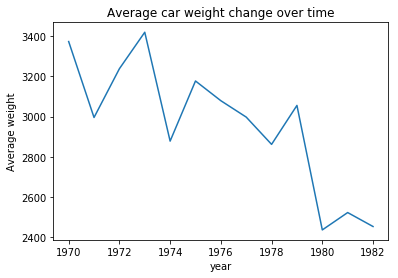

In [12]:
plt.plot(years_lab, avg_weight_year)
plt.title("Average car weight change over time")
plt.ylabel("Average weight")
plt.xlabel("year")
plt.show()

That looks intersting; the weight of the cars look like almost a prefect inverse relation to the fuel consumption.

Next, plotting the graphs together. 

** A note ** 
The weight of the cars was divided by a 100 so that their graphs will show the scale relative to each other. 

In [13]:
# divide the weight by 100 to have it on the same scale as the mpg
avg_100weight_year = []
for i in avg_weight_year:
    i = i / 100
    avg_100weight_year.append(i)

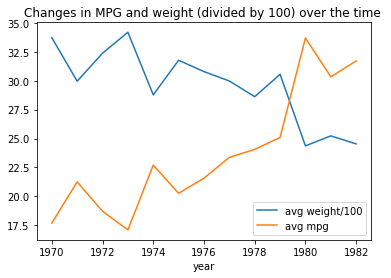

In [14]:
plt.plot(years_lab, avg_100weight_year)
plt.plot(years_lab, avg_mpg_year)
plt.legend(["avg weight/100", "avg mpg"])
plt.title("Changes in MPG and weight (divided by 100) over the time ")
plt.xlabel("year")
plt.show()

That is impressive. The peaks of MPG and weight are almost identical but flipped. That shows an inverse relationship between the two.

Lastly, I will show how the horsepower has changed in this timeframe.
And then we will plot all of three (avg MPG, avg weight, avg HP) on the same graph and show the conclusion. 

In [15]:
# list of average horsepower change by year
avg_hp_year = [np.mean(year_70.horsepower), np.mean(year_71.horsepower), np.mean(year_72.horsepower), np.mean(year_73.horsepower),
              np.mean(year_74.horsepower), np.mean(year_75.horsepower), np.mean(year_76.horsepower), np.mean(year_77.horsepower),
               np.mean(year_78.horsepower), np.mean(year_79.horsepower), np.mean(year_80.horsepower), np.mean(year_81.horsepower), 
               np.mean(year_82.horsepower)]

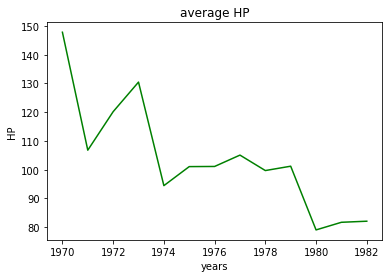

In [16]:
plt.plot(years_lab, avg_hp_year, color="green")
plt.title("average HP")
plt.xlabel("years")
plt.ylabel("HP")
plt.show()

Now, all together.

** A note ** The horsepower of the cars was divided by 10 so that their graph will still be to scale relatively to each other.

In [17]:
# new list with average horsepower divided by 10
avg_10hp_year = []
for h in avg_hp_year:
    h = h / 10
    avg_10hp_year.append(h)

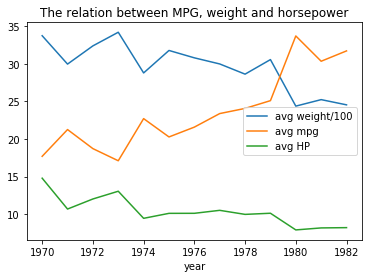

In [18]:
# plotting the three graphs together to show tendency

plt.plot(years_lab, avg_100weight_year)
plt.plot(years_lab, avg_mpg_year)
plt.plot(years_lab, avg_10hp_year)
plt.legend(["avg weight/100", "avg mpg", "avg HP"])
plt.title("The relation between MPG, weight and horsepower")
plt.xlabel("year")
plt.show()

From the above graph, it is possible to see that both the weight of the cars and the horsepower amount decreased.
On the other hand, the fuel consumption gets better (higher MPG value). 
This result aligns with the assumption which was made earlier, in the way that the MPG will get higher with newer cars.
However, we cannot conclude that the engines are more efficient because newer cars have smaller engines, on average, and are lighter.  

Before concluding, I will show this table, which shows, numerically, the average of all the data given in each year. 

In [19]:
car_df.groupby("year").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,Residue
year,,,,,,,,
70.0,17.689655,6.758621,281.413793,147.827586,3372.793103,12.948276,1.310345,61.454042
71.0,21.250000,5.571429,209.750000,106.785714,2995.428571,15.142857,1.428571,47.030076
72.0,18.714286,5.821429,218.375000,120.178571,3237.714286,15.125000,1.535714,51.532553
73.0,17.100000,6.375000,256.875000,130.475000,3419.025000,14.312500,1.375000,62.686745
74.0,22.703704,5.259259,171.740741,94.444444,2877.925926,16.203704,1.666667,40.347495
75.0,20.266667,5.600000,205.533333,101.066667,3176.800000,16.050000,1.466667,34.144450
76.0,21.573529,5.647059,197.794118,101.117647,3078.735294,15.941176,1.470588,37.431361
77.0,23.375000,5.464286,191.392857,105.071429,2997.357143,15.435714,1.571429,42.994927
78.0,24.061111,5.361111,177.805556,99.694444,2861.805556,15.805556,1.611111,46.559969


### Conclusion

From the data which was presented, it is possible to conclude that newer cars have better fuel consumption. 
This result comes from several different aspects. The aspects that I focused on were the total weight of the car, how many horsepowers it has. 
Other aspects which seemed to affect the MPG are the number of cylinders and the displacement in the engine. 
In general, everything got decreased - the number of cylinders, displacement, horsepower, weight, acceleration (slower). 
The effect is higher MPG value. 
Both the horsepower and weight have a negative steep incline, which is showed in the graphs presented above.

Credit:
The dataset was given to me by my mentor Vikram Bandugula.  